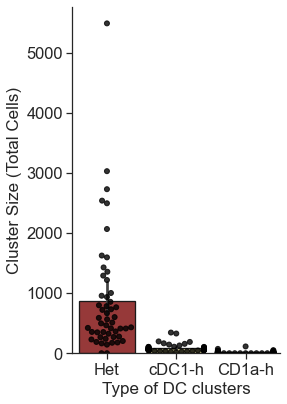

In [44]:
# Cells (with new assignment, not participate in the first step DBSCAN clustering) comprising the cluster
# There are Belong to DBSCAN cluster0, Belong to DBSCAN cluster1, and Belong to DBSCAN cluster2
# DBSCAN cluster0
df_DCs = pd.read_csv("C:Data/DCs1_res/Res_all.txt")
df_cluster_cells = df_DCs[["Pt", "Phenotype", "Belong to DBSCAN cluster0"]]
df_cluster_cells1 = df_cluster_cells.dropna(subset=["Phenotype"])
df_cluster_cells2 = df_cluster_cells1.dropna(subset=["Belong to DBSCAN cluster0"])
df_cluster_cells2_pv = df_cluster_cells2.pivot_table(index=["Pt","Belong to DBSCAN cluster0"], 
columns=["Phenotype"], aggfunc=lambda x: len(x)).fillna(0)
df_cluster_cells2_pv.reset_index(inplace = True)
df_cluster_cells2_pv["Total"]=df_cluster_cells2_pv["CD1a+PD-L1+"]+df_cluster_cells2_pv["CD1a+PD-L1-"]+df_cluster_cells2_pv["CD8+"]+df_cluster_cells2_pv["Others"]
first_ = df_cluster_cells2_pv[["Pt", "Belong to DBSCAN cluster0", "Total"]].rename(columns = {"Belong to DBSCAN cluster0": "Cluster"})

# DBSCAN cluster1
df_cluster_cellsA = df_DCs[["Pt", "Phenotype", "Belong to DBSCAN cluster1"]]
df_cluster_cells1A = df_cluster_cellsA.dropna(subset=["Phenotype"])
df_cluster_cells2A = df_cluster_cells1A.dropna(subset=["Belong to DBSCAN cluster1"])
df_cluster_cells2A_pv = df_cluster_cells2A.pivot_table(index=["Pt","Belong to DBSCAN cluster1"], 
columns=["Phenotype"], aggfunc=lambda x: len(x)).fillna(0)
df_cluster_cells2A_pv.reset_index(inplace = True)
df_cluster_cells2A_pv["TotalA"]=df_cluster_cells2A_pv["CD1a+PD-L1+"]+df_cluster_cells2A_pv["CD1a+PD-L1-"]+df_cluster_cells2A_pv["CD8+"]+df_cluster_cells2A_pv["Others"]
Second_ = df_cluster_cells2A_pv[["Pt", "Belong to DBSCAN cluster1", "TotalA"]].rename(columns = {"Belong to DBSCAN cluster1": "Cluster"})

# DBSCAN cluster2
df_cluster_cellsB = df_DCs[["Pt", "Phenotype", "Belong to DBSCAN cluster2"]]
df_cluster_cells1B = df_cluster_cellsB.dropna(subset=["Phenotype"])
df_cluster_cells2B = df_cluster_cells1B.dropna(subset=["Belong to DBSCAN cluster2"])
df_cluster_cells2B_pv = df_cluster_cells2B.pivot_table(index=["Pt","Belong to DBSCAN cluster2"], 
columns=["Phenotype"], aggfunc=lambda x: len(x)).fillna(0)
df_cluster_cells2B_pv.reset_index(inplace = True)
df_cluster_cells2B_pv["TotalB"]=df_cluster_cells2B_pv["CD8+"]+df_cluster_cells2B_pv["Others"]
Third_ = df_cluster_cells2B_pv[["Pt", "Belong to DBSCAN cluster2", "TotalB"]].rename(columns = {"Belong to DBSCAN cluster2": "Cluster"})

# Sum above togehter, alongside with type of clusters
Alls = pd.concat([first_, Second_, Third_]).fillna(0)
Alls["Sum"]=Alls["Total"]+Alls["TotalA"]+Alls["TotalB"]
Alls_ = Alls[["Pt", "Cluster", "Sum"]]
Size_cType = pd.merge(Alls_, cType, how ="outer").fillna(0) 


# Cells (that participate in the first step DBSCAN clustering) comprising the cluster
#Cluster Size of DCs, add, total_final
df_Cluster_pv2 = pd.read_csv("C:/Data/DCs_results/c_Type.txt")
df_Cluster_pv2["Total_DCs"]=df_Cluster_pv2["CD141+PD-L1+"]+df_Cluster_pv2["CD141+PD-L1-"]+df_Cluster_pv2["CD1a+PD-L1+"]+df_Cluster_pv2["CD1a+PD-L1-"]+df_Cluster_pv2["CD1a+"]
Size_DCs = df_Cluster_pv2[["Pt", "Cluster", "Total_DCs"]].fillna(0)

# Add all the cells together 
Size_cType_all = pd.merge(Size_cType, Size_DCs, how = "outer")
Size_cType_all["Sum_all"] = Size_cType_all["Sum"]+Size_cType_all["Total_DCs"]
SIZE_cType = Size_cType_all[["Pt", "Cluster","c_Type", "Sum_all"]]
SIZE_cType.to_csv("C:/Data/DCs_results/SIZE_c_Type.txt")


# Pivot as per specimen, take the mean of cluster size
# Remove control sampels
BC_Size_cType = SIZE_cType[~SIZE_cType["Pt"].isin(["Norm LN1x4","Norm LN2x4","Norm LN3x4","Norm LN4x4"])]
# mean value of (types of) cluster size, per specimen
CD1a_h_size = BC_Size_cType[(BC_Size_cType["c_Type"]=="CD1a-h")].groupby("Pt")[["Sum_all"]].mean()
CD1a_h_size1 = CD1a_h_size.rename(columns={"Sum_all":"CD1a-h_Size"})
cDC1_h_size = BC_Size_cType[(BC_Size_cType["c_Type"]=="cDC1-h")].groupby("Pt")[["Sum_all"]].mean()
cDC1_h_size1 = cDC1_h_size.rename(columns={"Sum_all":"cDC1-h_size"})
Het_size = BC_Size_cType[(BC_Size_cType["c_Type"]=="Het")].groupby("Pt")[["Sum_all"]].mean()
Het_size1 = Het_size.rename(columns={"Sum_all":"Het_size"})
SIZE_cType_Pts = pd.concat([CD1a_h_size1, cDC1_h_size1, Het_size1], axis=1)
SIZE_cType_Pts.to_csv("C:/Data/DCs_results/SIZE_cType_Pts.txt")

# Plot and save
SIZE_cType_Pts = pd.read_csv("C:/Data/DCs_results/SIZE_cType_Pts.txt")
SIZE_cType_Pts1 = SIZE_cType_Pts.rename(columns={"Unnamed: 0":"Pt"})
SIZE_cType_Pts2 = pd.melt(SIZE_cType_Pts1, id_vars=["Pt"], value_vars = ["Het_size","cDC1-h_size", "CD1a-h_Size"]).rename(columns =
{"variable":"Type of DC clusters", "value":"Cluster Size (Total Cells)"}).fillna(0).round(1)
sns.set(style = "ticks", font_scale = 1.5, color_codes=True)
g = sns.catplot(y='Cluster Size (Total Cells)', x='Type of DC clusters', data=SIZE_cType_Pts2, kind = "swarm", marker='o', alpha=0.8,color="black", 
                height = 6, aspect = .75, linewidth = 1)
sns.barplot(y='Cluster Size (Total Cells)', x='Type of DC clusters', data=SIZE_cType_Pts2, alpha=1,edgecolor="0.1", linewidth=1.3,ax = g.ax, 
            palette={"Het_size": "brown", "cDC1-h_size": "khaki", "CD1a-h_Size": "black"})
g.set(xticklabels=["Het","cDC1-h","CD1a-h"])
plt.xlabel('Type of DC clusters', fontsize=17)
plt.ylabel('Cluster Size (Total Cells)', fontsize=17)
g.savefig('C:/Data/DCs_results/fig1_size.tiff', format='tiff', dpi=600)
plt.show()

df_Cluster_pv2 = pd.read_csv("C:/Data/DCs_results/c_Type.txt")